# **Import Dataset**

In [ ]:
# Import the required libraries
import pandas as pd

# Set the file path
file_path = '/content/drive/MyDrive/Atinuke/sobar-72.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# View the first 5 rows of the DataFrame
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


## **Data Cleaning**

Find and replace missing value

In [ ]:
# Checking for missing data
missing_data = df.isnull().sum()

if missing_data.sum() == 0:
    print("No missing data")
else:
    print("Missing Data:\n", missing_data)

No missing data


Removing any duplicates or irrelevant variables

In [ ]:
# Check for duplicates
duplicates = df.duplicated()
if duplicates.sum() > 0:
    print("Duplicates found. Removing duplicates...")
    df = df[~duplicates]
else:
    print("No duplicates found.")

No duplicates found.


Define a function to handle outliers

In [ ]:
import numpy as np

# Define the threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Calculate the IQR for each numeric column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))

# Check if any outliers are found
if outliers.any().any():
    # Remove outliers by setting them to NaN or delete the rows
    df[outliers] = np.nan  # Set outliers to NaN
    df = df.dropna()  # Drop rows with NaN values
else:
    print("No outliers found")

## **Perform Exploratory Data Analysis**

Missing Data:
 behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64
Descriptive Statistics:
        behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
count                 59.0        59.000000                59.000000   
mean                  10.0        12.847458                11.305085   
std                    0.0         2.024110                 2.966795   
min                

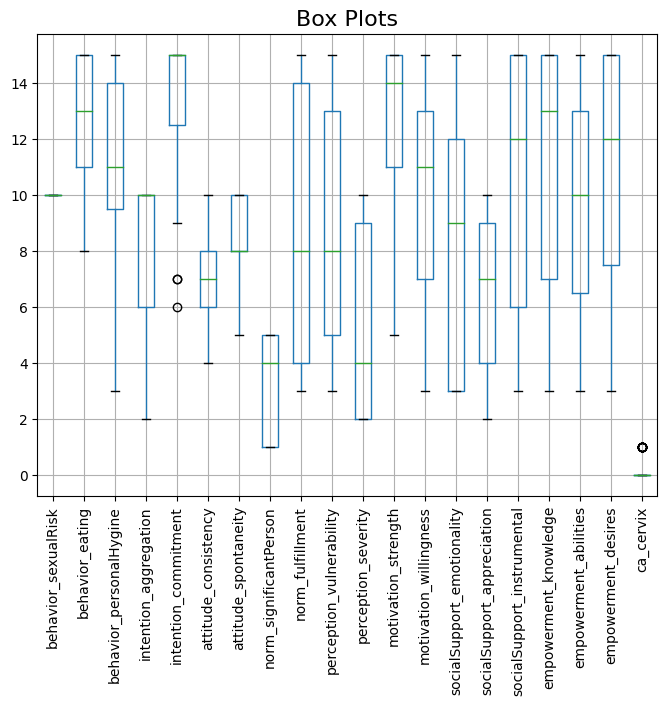

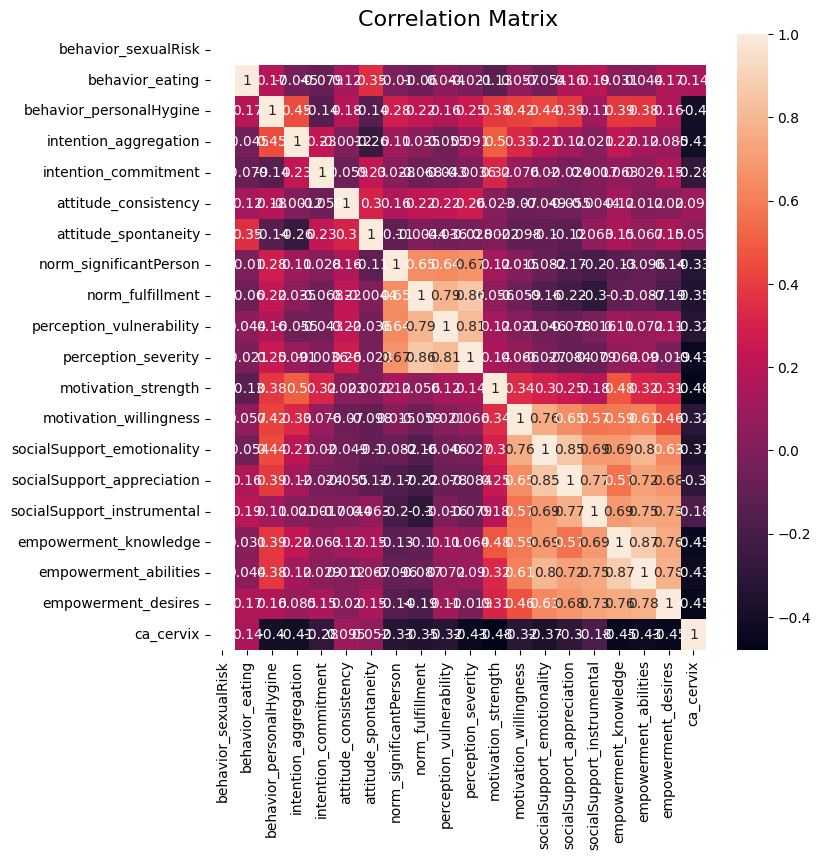

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for missing data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# Descriptive statistics
statistics = df.describe()
print("Descriptive Statistics:\n", statistics)

# Set the plot size
plt.figure(figsize=(8, 6))  # Adjust the width and height as desired

# Box plots
df.boxplot()
plt.title("Box Plots", fontsize=16)  # Set the size of the plot title
plt.xticks(rotation=90)
plt.show()

# Set the plot size
plt.figure(figsize=(8, 8))  # Adjust the width and height as desired

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix", fontsize=16)  # Set the size of the plot title
plt.xticks(rotation=90)  # Rearrange x-axis labels
plt.show()


# Feature Enginnering

In [ ]:
# Print all the columns
df.columns

Index(['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine',
       'intention_aggregation', 'intention_commitment', 'attitude_consistency',
       'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
       'perception_vulnerability', 'perception_severity',
       'motivation_strength', 'motivation_willingness',
       'socialSupport_emotionality', 'socialSupport_appreciation',
       'socialSupport_instrumental', 'empowerment_knowledge',
       'empowerment_abilities', 'empowerment_desires', 'ca_cervix'],
      dtype='object')

Using Risk factors based on demographics and behaviour to select feature variables
all variables are used

In [ ]:
# select featured variables
X = df[['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine',
       'intention_aggregation', 'intention_commitment', 'attitude_consistency',
       'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
       'perception_vulnerability', 'perception_severity',
       'motivation_strength', 'motivation_willingness',
       'socialSupport_emotionality', 'socialSupport_appreciation',
       'socialSupport_instrumental', 'empowerment_knowledge',
       'empowerment_abilities', 'empowerment_desires']]

y = df[['ca_cervix']]

Perform Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Perform feature scaling on the selected variables
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Perform Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=2)  # Specify the number of components you want to keep

# Perform PCA on the scaled feature data
X_pca = pca.fit_transform(X_scaled)

# X_pca now contains the transformed data with reduced dimensions

# **Split Data Set To Test And Train Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

## **Import and Implement Random Forest Classifer**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with 100 estimators
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

<ipython-input-12-85186438739b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


# **Performance Evaluation**

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print(classification_rep)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have your true labels and predicted probabilities
true_labels = [0, 1, 1, 0, 1]
predicted_probs = [0.2, 0.6, 0.8, 0.3, 0.9]

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)

# Print the AUC
print("AUC:", auc)

AUC: 0.875


In [ ]:
# Get the feature importances
importances = rf_classifier.feature_importances_

# Print the feature importances with column names
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")

behavior_sexualRisk: 0.0
behavior_eating: 0.021699455193581622
behavior_personalHygine: 0.14725017744548857
intention_aggregation: 0.043701320058075206
intention_commitment: 0.06439216085374526
attitude_consistency: 0.010182405798696819
attitude_spontaneity: 0.021782939170070112
norm_significantPerson: 0.054823334888103016
norm_fulfillment: 0.0581687622901637
perception_vulnerability: 0.022159896043386893
perception_severity: 0.045694863708697984
motivation_strength: 0.10765498218253516
motivation_willingness: 0.07378437226430043
socialSupport_emotionality: 0.02442065006012337
socialSupport_appreciation: 0.037292775583937635
socialSupport_instrumental: 0.04117107687735866
empowerment_knowledge: 0.08261426678707456
empowerment_abilities: 0.04732112980986218
empowerment_desires: 0.09588543098479863


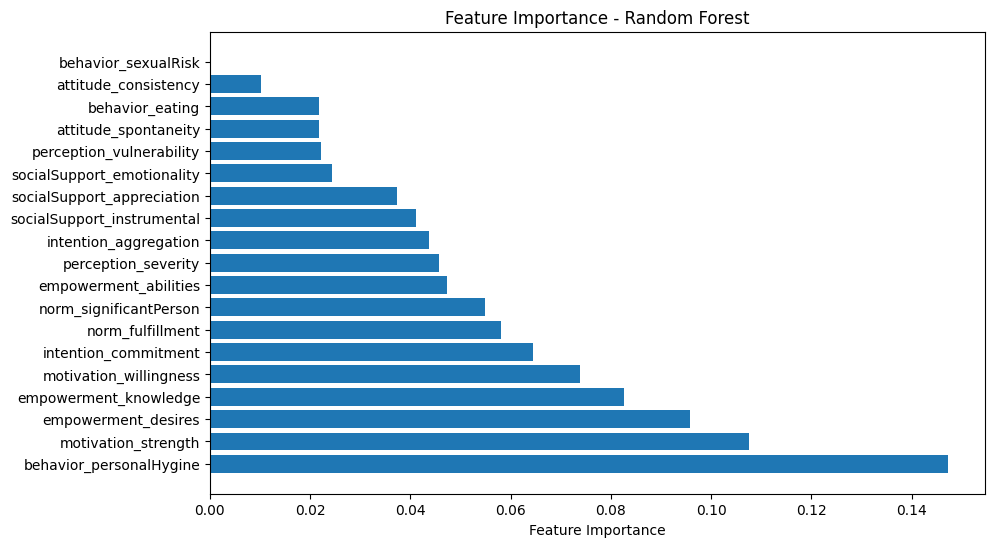

F1 Score: empowerment_desires


In [ ]:
# Sort the features and importances in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = X_train.columns[indices]

# Plot the F1 score
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

# Print the F1 score
print(f"F1 Score: {feature}")

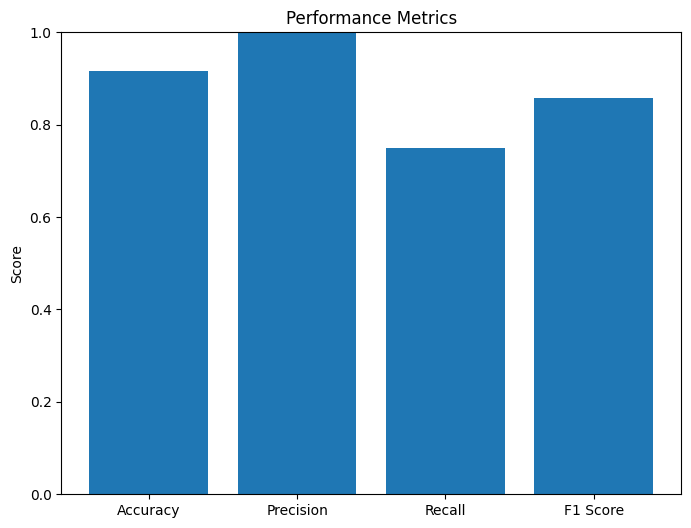

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the performance metrics
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.ylim([0, 1])
plt.show()